In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import datetime
from datetime import date, timedelta


In [2]:
import clean
import preproc


In [3]:
data1, data2, data3, data4 = clean.get_data()
data = clean.clean_all(data1, data2, data3, data4, clean.get_bairros_data())

In [4]:
data.to_csv("data_cleaned.csv")


In [5]:
preproc_data_n, preproc_data_rate = preproc.get_format(data)

In [6]:
preproc_data_n.to_csv("preproc_data_n.csv")
preproc_data_rate.to_csv("preproc_data_rate.csv")


In [7]:
preproc_data_rate

nb_crimes                                                   \
AR          Anchieta     Bangu Barra da Tijuca  Botafogo Campo Grande   
Date                                                                    
2008-12-31  0.025522  0.009079        0.011007  0.000000     0.010674   
2009-01-01  0.063703  0.047398        0.052289  0.057072     0.066402   
2009-01-02  0.031852  0.015799        0.010458  0.009512     0.045433   
2009-01-03  0.006370  0.040626        0.017430  0.014268     0.027959   
2009-01-04  0.006370  0.029341        0.006972  0.014268     0.033201   
...              ...       ...             ...       ...          ...   
2019-12-27  0.031555  0.017175        0.028888  0.082877     0.016165   
2019-12-28  0.044177  0.034350        0.022698  0.049726     0.019104   
2019-12-29  0.056799  0.015028        0.018571  0.060776     0.010287   
2019-12-30  0.031555  0.030056        0.024761  0.055251     0.011756   
2019-12-31  0.000000  0.000000        0.000000  0.000000     0.001470   

                                                                             \
AR            Centro Cidade de Deus Complexo do Alemao Copacabana Guaratiba   
Date                                                                          
2008-12-31  0.066617       0.000000           0.000000   0.034691  0.050378   
2009-01-01  0.103458       0.198661           0.000000   0.070387  0.083396   
2009-01-02  0.206917       0.000000           0.000000   0.056310  0.015163   
2009-01-03  0.103458       0.198661           0.000000   0.042232  0.037907   
2009-01-04  0.206917       0.099331           0.000000   0.035194  0.015163   
...              ...            ...                ...        ...       ...   
2019-12-27  1.117004       0.000000           0.000000   0.073479  0.007922   
2019-12-28  0.777046       0.000000           0.000000   0.155123  0.011884   
2019-12-29  0.339958       0.062570           0.016988   0.236767  0.003961   
2019-12-30  0.485654       0.031285           0.000000   0.081644  0.011884   
2019-12-31  0.000000       0.000000           0.000000   0.008164  0.000000   

            ...                                                       \
AR          ... Portuaria     Ramos  Realengo Rio Comprido   Rocinha   
Date        ...                                                        
2008-12-31  ...  0.000000  0.006877  0.026449     0.015969  0.000000   
2009-01-01  ...  0.029703  0.062168  0.046459     0.114169  0.014499   
2009-01-02  ...  0.000000  0.034538  0.025811     0.016310  0.000000   
2009-01-03  ...  0.059406  0.041445  0.041297     0.048929  0.014499   
2009-01-04  ...  0.000000  0.034538  0.036135     0.114169  0.000000   
...         ...       ...       ...       ...          ...       ...   
2019-12-27  ...  0.108767  0.036309  0.047438     0.060599  0.000000   
2019-12-28  ...  0.072512  0.036309  0.038813     0.040399  0.000000   
2019-12-29  ...  0.036256  0.029047  0.038813     0.080799  0.000000   
2019-12-30  ...  0.072512  0.021785  0.017250     0.000000  0.011689   
2019-12-31  ...  0.000000  0.000000  0.000000     0.000000  0.000000   

                                                                        
AR         Santa Cruz Santa Teresa Sao Cristovao    Tijuca Vila Isabel  
Date                                                                    
2008-12-31   0.002863     0.057947      0.052674  0.006297    0.000000  
2009-01-01   0.062111     0.000000      0.072225  0.012807    0.053311  
2009-01-02   0.028232     0.192864      0.018056  0.025613    0.038079  
2009-01-03   0.014116     0.096432      0.054169  0.019210    0.015232  
2009-01-04   0.042349     0.000000      0.126394  0.012807    0.007616  
...               ...          ...           ...       ...         ...  
2019-12-27   0.007407     0.033653      0.071630  0.091264    0.050575  
2019-12-28   0.004938     0.067305      0.071630  0.022816    0.057800  
2019-12-29   0.012346     0.067305      0.071630  0.022816    0.02890

In [8]:
districts = [x[1] for x in preproc_data_n.columns]

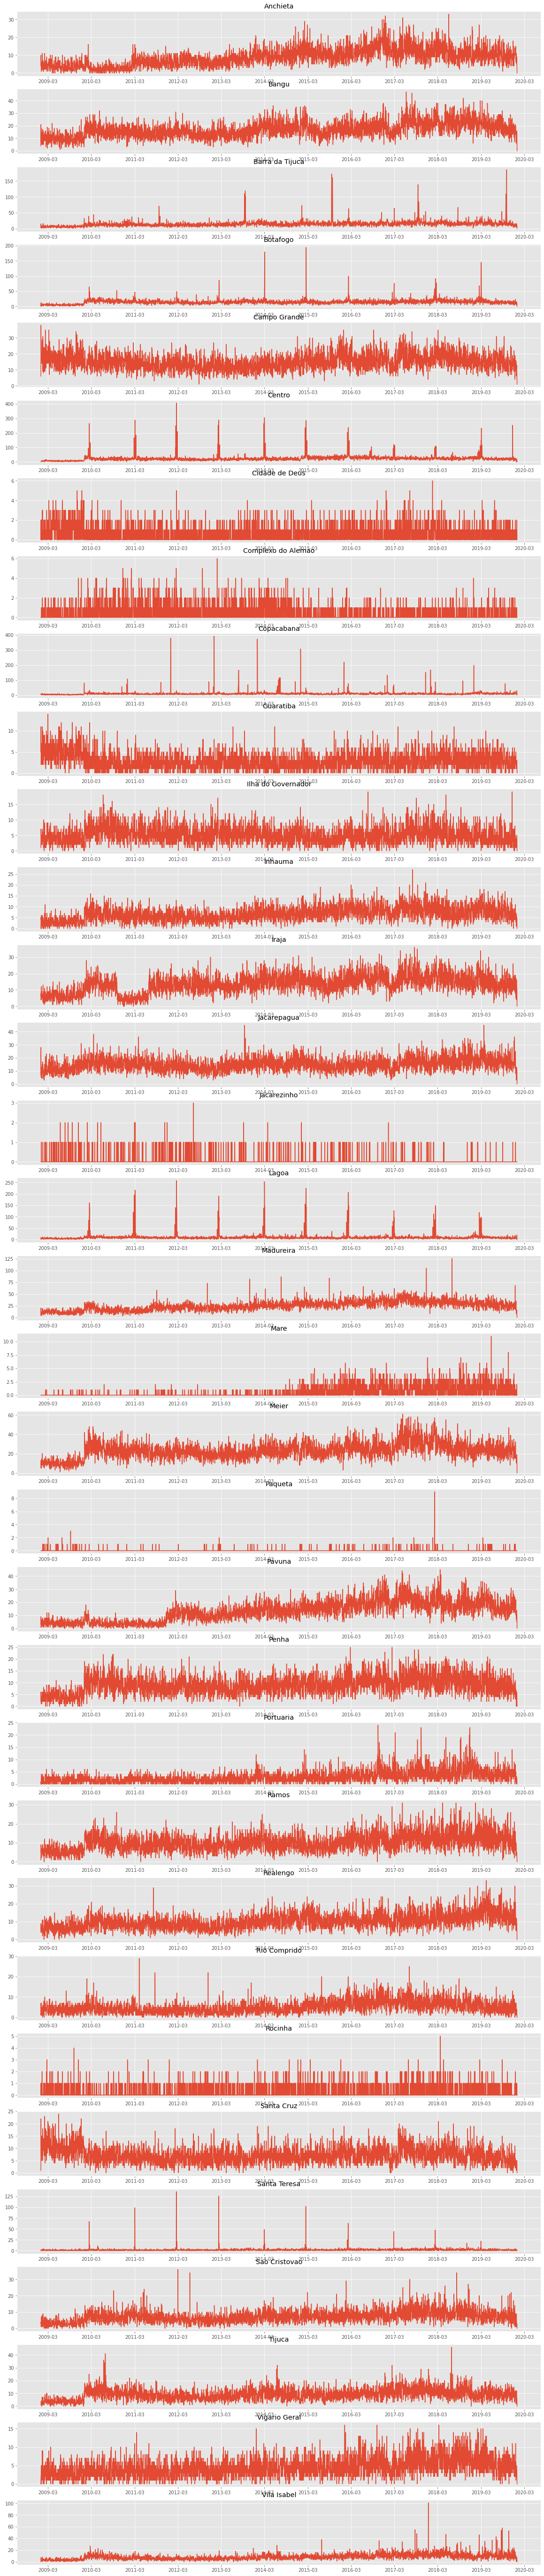

In [9]:
from matplotlib.dates import MonthLocator
fig, axs = plt.subplots(33,1,figsize=(20,100))
for i,j in enumerate (districts):
    timeserie = preproc.extract_ts(preproc_data_n,j)
    axs[i].plot(timeserie.ds, timeserie.y)
    axs[i].set_title(j)
    axs[i].xaxis.set_major_locator(MonthLocator(bymonth=3))
plt.show()

# Univariate LSTM Preproc

Creates train/test data for a single region

In [100]:
Centro_df = preproc.extract_ts(preproc_data_rate,"Centro")["y"]

In [102]:
def subsample_sequence(df, length):
    """
    Given the initial dataframe `df`, return a shorter dataframe sequence of length `length`.
    This shorter sequence should be selected at random
    """
    last_possible = df.shape[0] - length
    
    random_start = np.random.randint(0, last_possible)
    df_sample = df[random_start: random_start+length]

    return df_sample

In [103]:
def split_subsample_sequence(df, length):
    '''Create one single random (X,y) pair'''
    df_subsample = subsample_sequence(df, length)
    y_sample = df_subsample.iloc[length -1]
    
    X_sample = df_subsample[0:length -1]
    X_sample = X_sample.values
    return np.array(X_sample), np.array(y_sample)

In [104]:
def get_X_y(df, n_sequences, length):
    '''Return a list of samples (X, y)'''
    X, y = [], []

    for i in range(n_sequences):
        (xi, yi) = split_subsample_sequence(df, length)
        X.append(xi)
        y.append(yi)
        
    X = np.array(X)
    y = np.array(y)
    return X, y

In [145]:
import math
def get_train_test(df,n_sequences,length):
    '''Returns train and test data for X and y'''
    len_ = int(0.8*df.shape[0])
    df_train = df[:len_]
    df_test = df[len_:]
    
    test_seq = math.floor(n_sequences/4)
    
    X_train, y_train = get_X_y(df_train, n_sequences, length)
    X_test, y_test = get_X_y(df_test, test_seq, length)
    
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
    
    return X_train, y_train, X_test, y_test

In [146]:
#output
X_train, y_train, X_test, y_test = get_train_test(Centro_df, 200, 21)

- ignore below
- below includes working out and dummy model to ensure output works

In [147]:
'''
len_ = int(0.8*Centro_df.shape[0])
df_train = Centro_df[:len_]
df_test = Centro_df[len_:]

X_train, y_train = get_X_y(df_train, 200, 21)
X_test, y_test = get_X_y(df_test, 50, 21)
''';

In [148]:
#X_train.shape, X_test.shape

In [149]:
#X_train = X_train.reshape(200, 20,1)
#X_test = X_test.reshape(50, 20,1)

In [150]:
#X_train.shape, X_test.shape

In [151]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers.experimental.preprocessing import Normalization

def init_model():
    metric = metrics.MAPE
    opt = optimizers.RMSprop(learning_rate=0.01)
    
    #normalizer = Normalization()
    #normalizer.adapt(X_train)

    model = models.Sequential()
    #model.add(normalizer)
    model.add(layers.LSTM(20, activation='tanh', input_shape=(20,1)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(loss='mse', 
                  optimizer=opt, 
                  metrics=[metric])
    
    return model

In [152]:
model = init_model()
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 20)                1760      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 6         
Total params: 2,031
Trainable params: 2,031
Non-trainable params: 0
_________________________________________________________________


In [153]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train,
            validation_split=0.2,
            epochs=1000, 
            batch_size=64,
            callbacks=[es], verbose=0)

Restoring model weights from the end of the best epoch.
Epoch 00093: early stopping


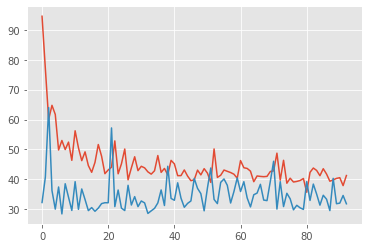

In [154]:
import matplotlib.pyplot as plt
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])

# Multivariate LSTM Preproc - incomplete

In [163]:
##not finished...

In [164]:
def get_mult_train_test(df,n_sequences,length):
    '''Returns train and test data for X and y'''
    len_ = int(0.8*df.shape[0])
    df_train = df[:len_]
    df_test = df[len_:]
    
    test_seq = math.floor(n_sequences/4)
    
    X_train, y_train = get_X_y(df_train, n_sequences, length)
    X_test, y_test = get_X_y(df_test, test_seq, length)
    
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
    
    return X_train, y_train, X_test, y_test

In [165]:
preproc_data_rate.T.shape

(30, 4018)

In [166]:
#get_X_y(preproc_data_rate, 200, 21)